In [1]:
import pandas as pd

In [2]:
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model


In [3]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [5]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [6]:
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
img_size=[224,224]

In [8]:
train_path="Train"
test_path="Test"

In [9]:
vgg=VGG16(input_shape=img_size+[3],weights='imagenet',include_top=False)

In [11]:
for layer in vgg.layers:
    layer.trainable=False

In [49]:
folders=glob('Train/*')
folders

['Train\\actinic keratosis',
 'Train\\basal cell carcinoma',
 'Train\\dermatofibroma',
 'Train\\melanoma',
 'Train\\nevus',
 'Train\\pigmented benign keratosis',
 'Train\\seborrheic keratosis',
 'Train\\squamous cell carcinoma',
 'Train\\vascular lesion']

In [50]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)

In [51]:
model=Model(inputs=vgg.input,outputs=prediction)

In [52]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
from tensorflow.keras.optimizers import Adam , Adamax
model.compile(Adamax(learning_rate = 0.001) ,loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
train_datagen=ImageDataGenerator(rescale=1.1255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1.1255)

In [55]:
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 2239 images belonging to 9 classes.


In [56]:
test_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 118 images belonging to 9 classes.


In [57]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\ayush\AppData\Local\Temp\ipykernel_3688\2138048561.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/5
70/70 [==============================] - 1846s 26s/step - loss: 7.1986 - accuracy: 0.3184 - val_loss: 8.6065 - val_accuracy: 0.3051
Epoch 2/5
70/70 [==============================] - 3311s 48s/step - loss: 3.7592 - accuracy: 0.4721 - val_loss: 8.0267 - val_accuracy: 0.3305
Epoch 3/5
70/70 [==============================] - 2686s 38s/step - loss: 2.9524 - accuracy: 0.5342 - val_loss: 8.5936 - val_accuracy: 0.2966
Epoch 4/5
70/70 [==============================] - 1521s 22s/step - loss: 2.7702 - accuracy: 0.5605 - val_loss: 6.4599 - val_accuracy: 0.3390
Epoch 5/5
70/70 [==============================] - 1510s 22s/step - loss: 2.2722 - accuracy: 0.6061 - val_loss: 7.5794 - val_accuracy: 0.3559


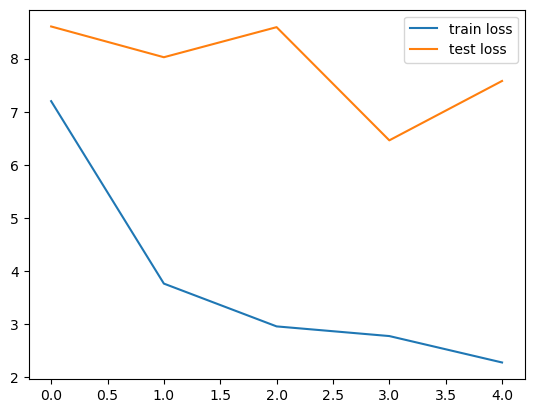

<Figure size 640x480 with 0 Axes>

In [59]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()
plt.show()
plt.savefig('lossval')


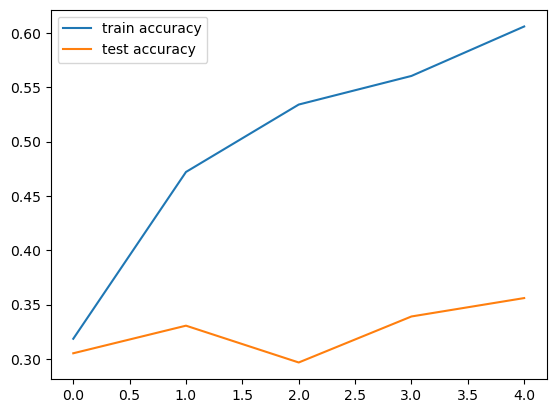

<Figure size 640x480 with 0 Axes>

In [62]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.show()
plt.savefig('Accval')

In [64]:
model.save("model.keras")